In [21]:
%run "C:\Users\justi\OneDrive\Documents\Beatrix\Data\AiCore\exploratory-data-analysis---customer-loans-in-finance258\db_utils.py"


             id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848         8000         8000.0             8000.0   
1      38656203   41440010        13200        13200.0            13200.0   
2      38656154   41439961        16000        16000.0            16000.0   
3      38656128   41439934        15000        15000.0            15000.0   
4      38656121   41439927        15000        15000.0            15000.0   
...         ...        ...          ...            ...                ...   
54226     76597      76583         5000         5000.0             1775.0   
54227    142608      74724         5000         5000.0             2350.0   
54228    117045      70978         3500         3500.0             2225.0   
54229     88854      70699         5000         5000.0              225.0   
54230     72323      70694         5000         5000.0              350.0   

            term  int_rate  instalment grade sub_grade  ... recoveries  \
0

C:\Users\justi\OneDrive\Documents\Beatrix\Data\AiCore\exploratory-data-analysis---customer-loans-in-finance258\db_utils.py:72: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col])
C:\Users\justi\OneDrive\Documents\Beatrix\Data\AiCore\exploratory-data-analysis---customer-loans-in-finance258\db_utils.py:72: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col])


In [22]:

info = DataFrameInfo(loans_df)
print("Column Data Types:")
print(info.describe_columns())




Column Data Types:
id                               int64
member_id                        int64
loan_amount                      int64
funded_amount                  float64
funded_amount_inv              float64
term                            object
int_rate                       float64
instalment                     float64
grade                           object
sub_grade                       object
employment_length               object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_date                      object
loan_status                     object
payment_plan                    object
purpose                         object
dti                            float64
delinq_2yrs                      int64
earliest_credit_line            object
inq_last_6mths                   int64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_accounts                    int64
total_

In [23]:
print("\nStatistical Values:")
print(info.extract_stats())





Statistical Values:
                 id     member_id   loan_amount  funded_amount  \
count  5.423100e+04  5.423100e+04  54231.000000   51224.000000   
mean   7.621797e+06  8.655350e+06  13333.076100   13229.509117   
std    9.571362e+06  1.031281e+07   8082.196709    8019.017599   
min    5.552100e+04  7.069400e+04    500.000000     500.000000   
25%    7.594330e+05  9.587720e+05   7000.000000    7000.000000   
50%    7.084590e+06  8.709873e+06  12000.000000   12000.000000   
75%    8.860616e+06  1.052714e+07  18000.000000   18000.000000   
max    3.867612e+07  4.146185e+07  35000.000000   35000.000000   

       funded_amount_inv      int_rate    instalment    annual_inc  \
count       54231.000000  49062.000000  54231.000000  5.423100e+04   
mean        12952.622979     13.507328    400.013953  7.222085e+04   
std          8099.473527      4.392893    238.920012  5.158934e+04   
min             0.000000      5.420000     15.670000  3.300000e+03   
25%          6700.000000     10.37

In [24]:
print("\nDistinct Values Count in Categorical Columns:")
print(info.count_distinct_values())




Distinct Values Count in Categorical Columns:
Series([], dtype: float64)


In [25]:
info.print_shape()

print("\nCount of Null Values:")
print(info.count_null_values())

DataFrame shape: (54231, 43)

Count of Null Values:
id                                 0
member_id                          0
loan_amount                        0
funded_amount                   3007
funded_amount_inv                  0
term                            4772
int_rate                        5169
instalment                         0
grade                              0
sub_grade                          0
employment_length               2118
home_ownership                     0
annual_inc                         0
verification_status                0
issue_date                         0
loan_status                        0
payment_plan                       0
purpose                            0
dti                                0
delinq_2yrs                        0
earliest_credit_line               0
inq_last_6mths                     0
mths_since_last_delinq         31002
mths_since_last_record         48050
open_accounts                      0
total_accounts         

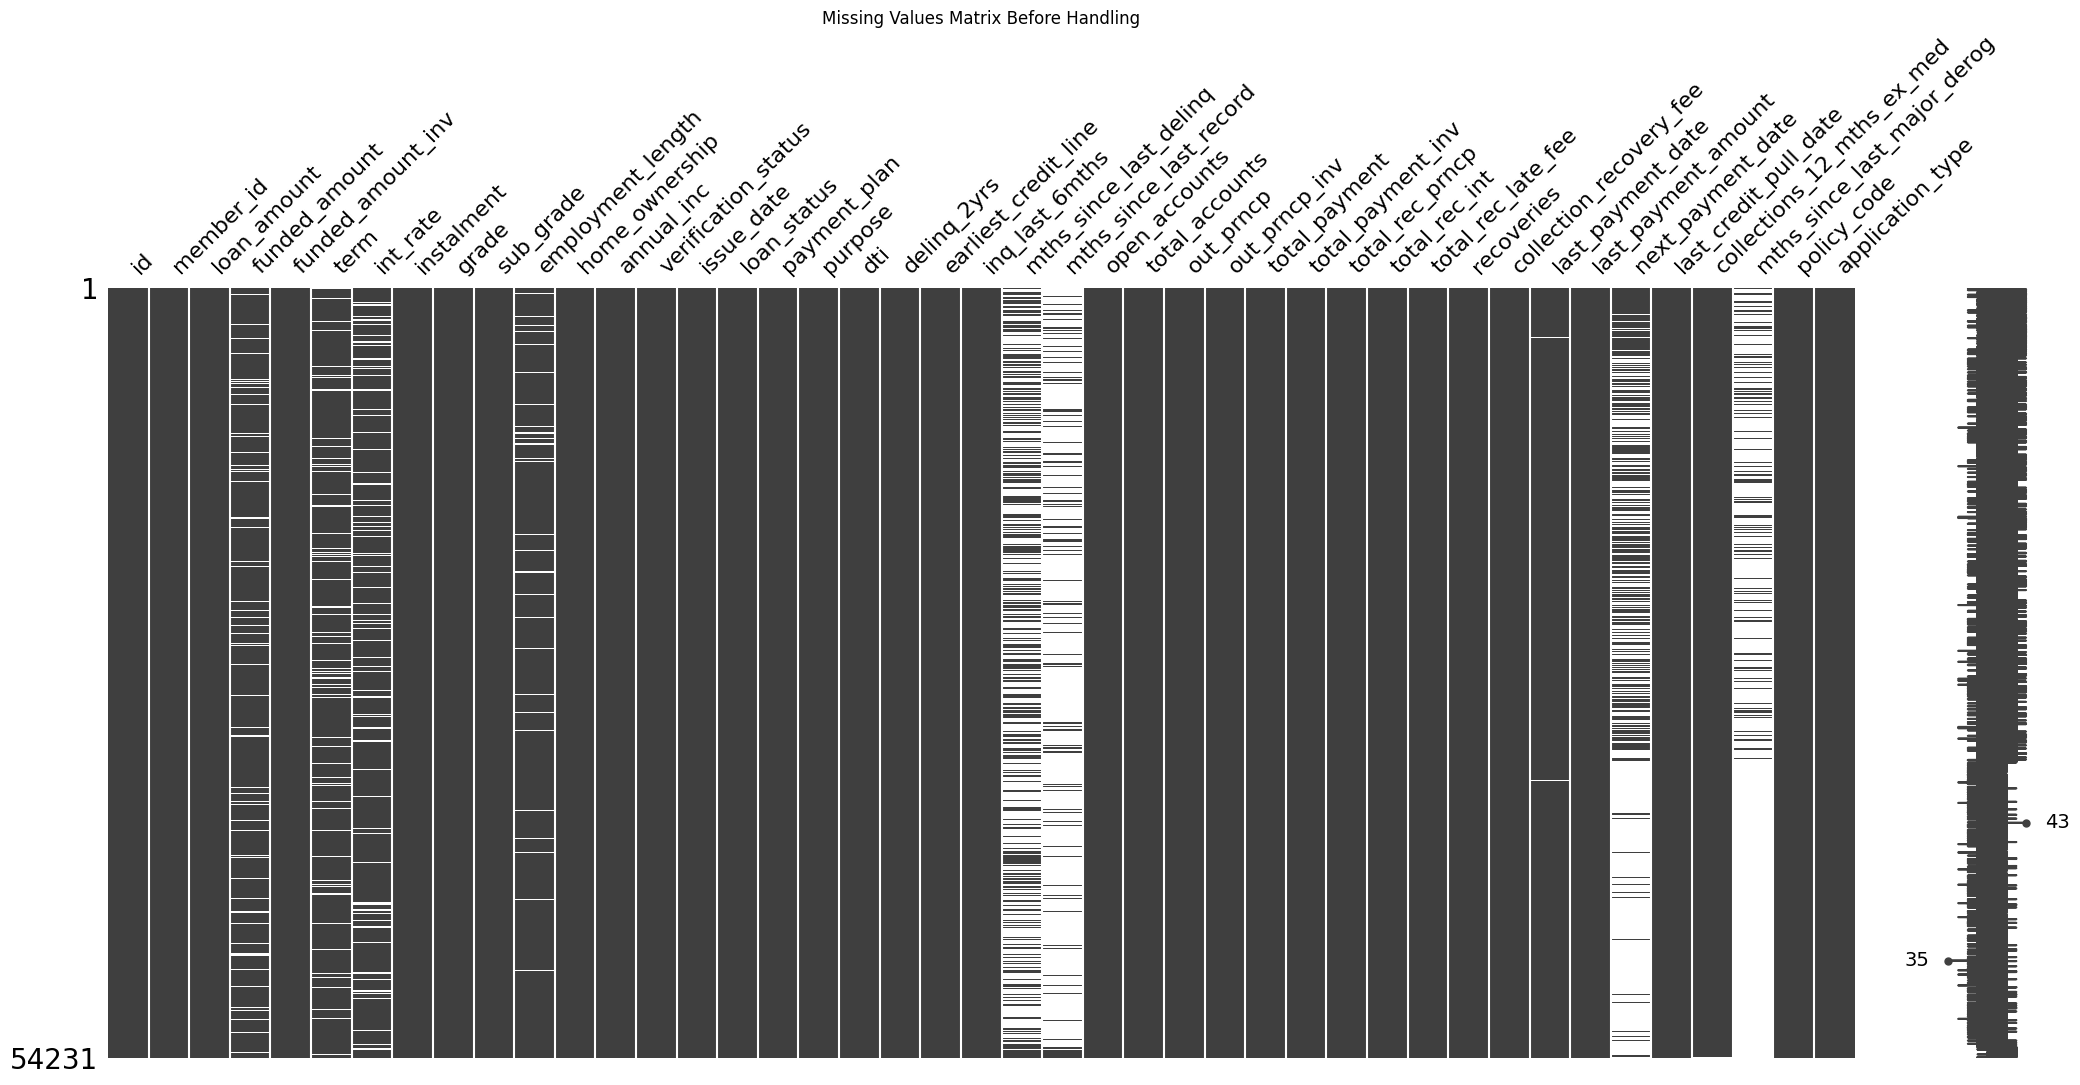

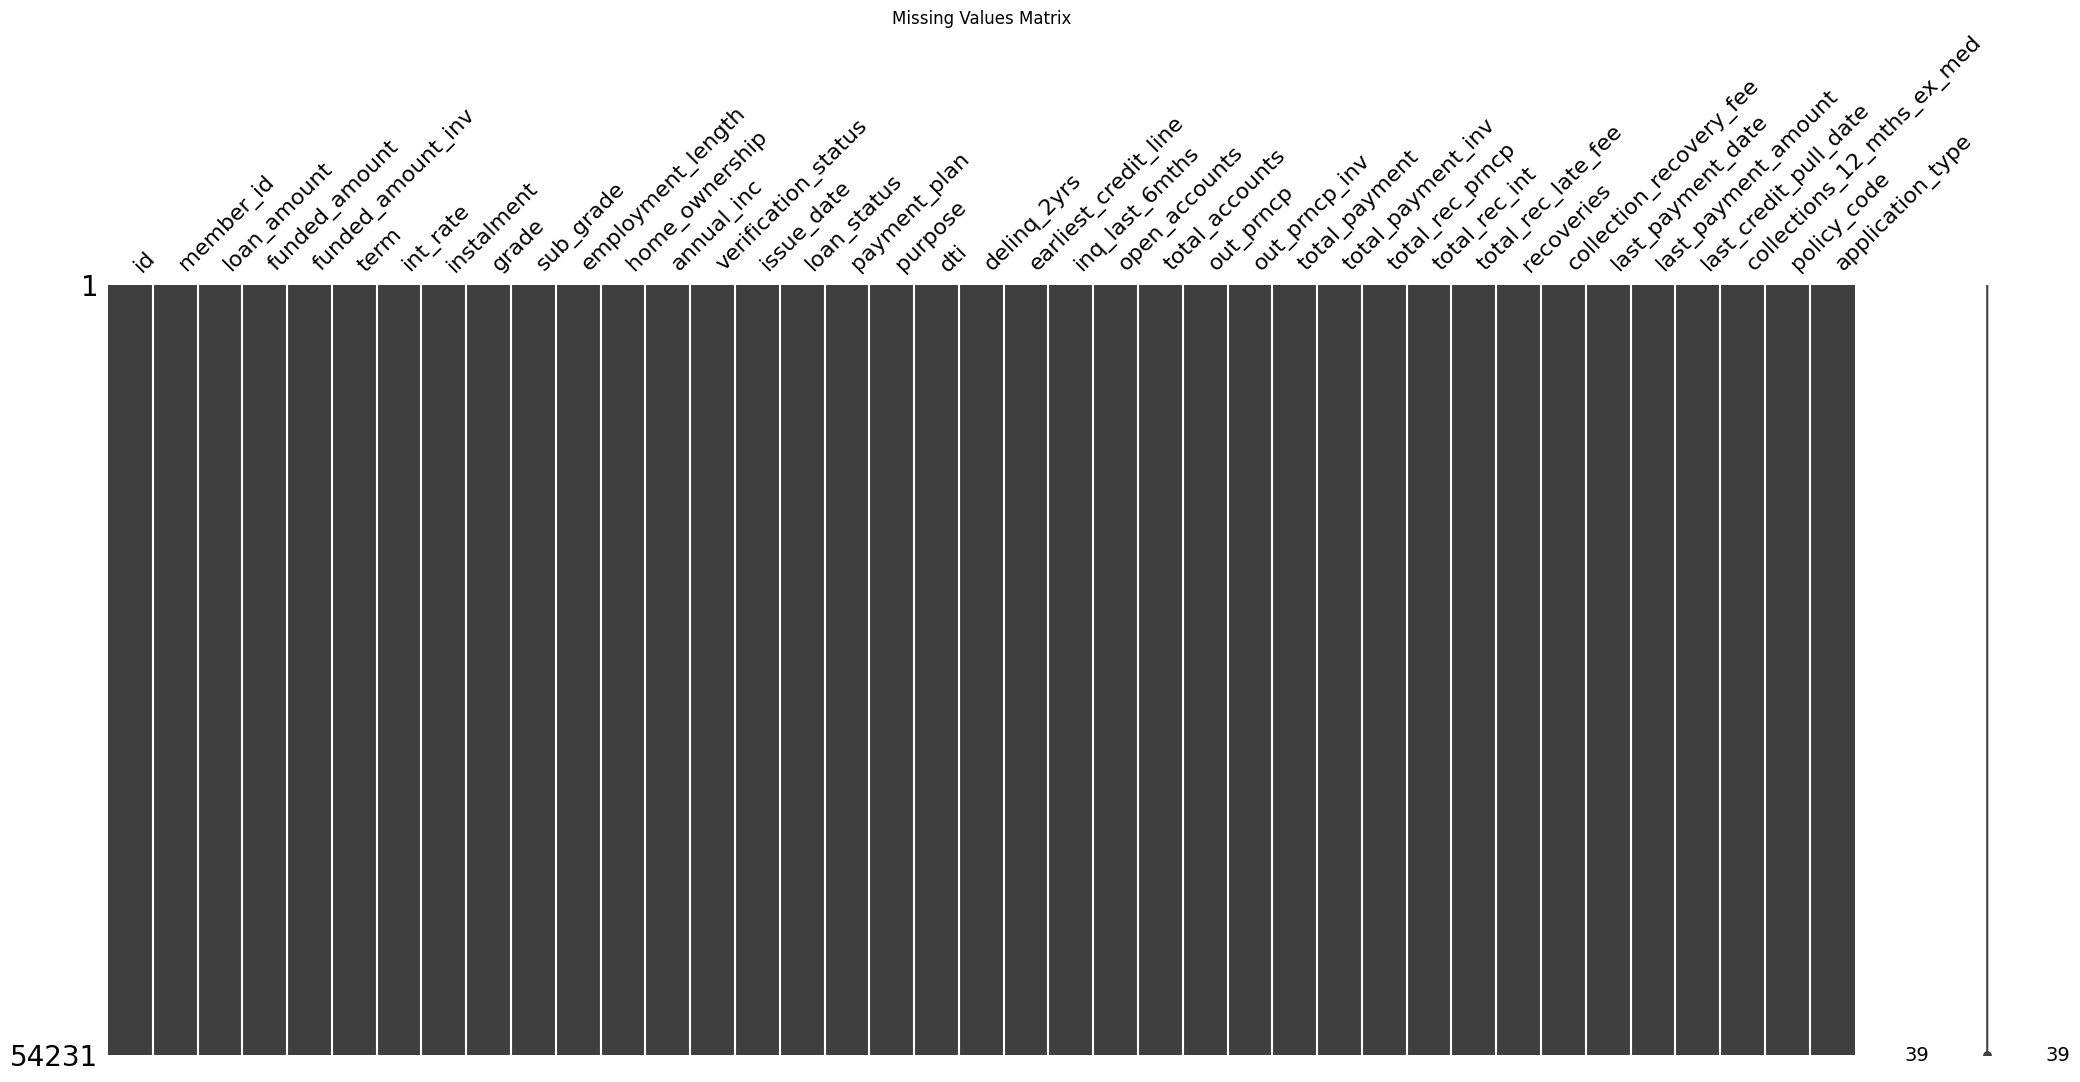

C:\Users\justi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\justi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


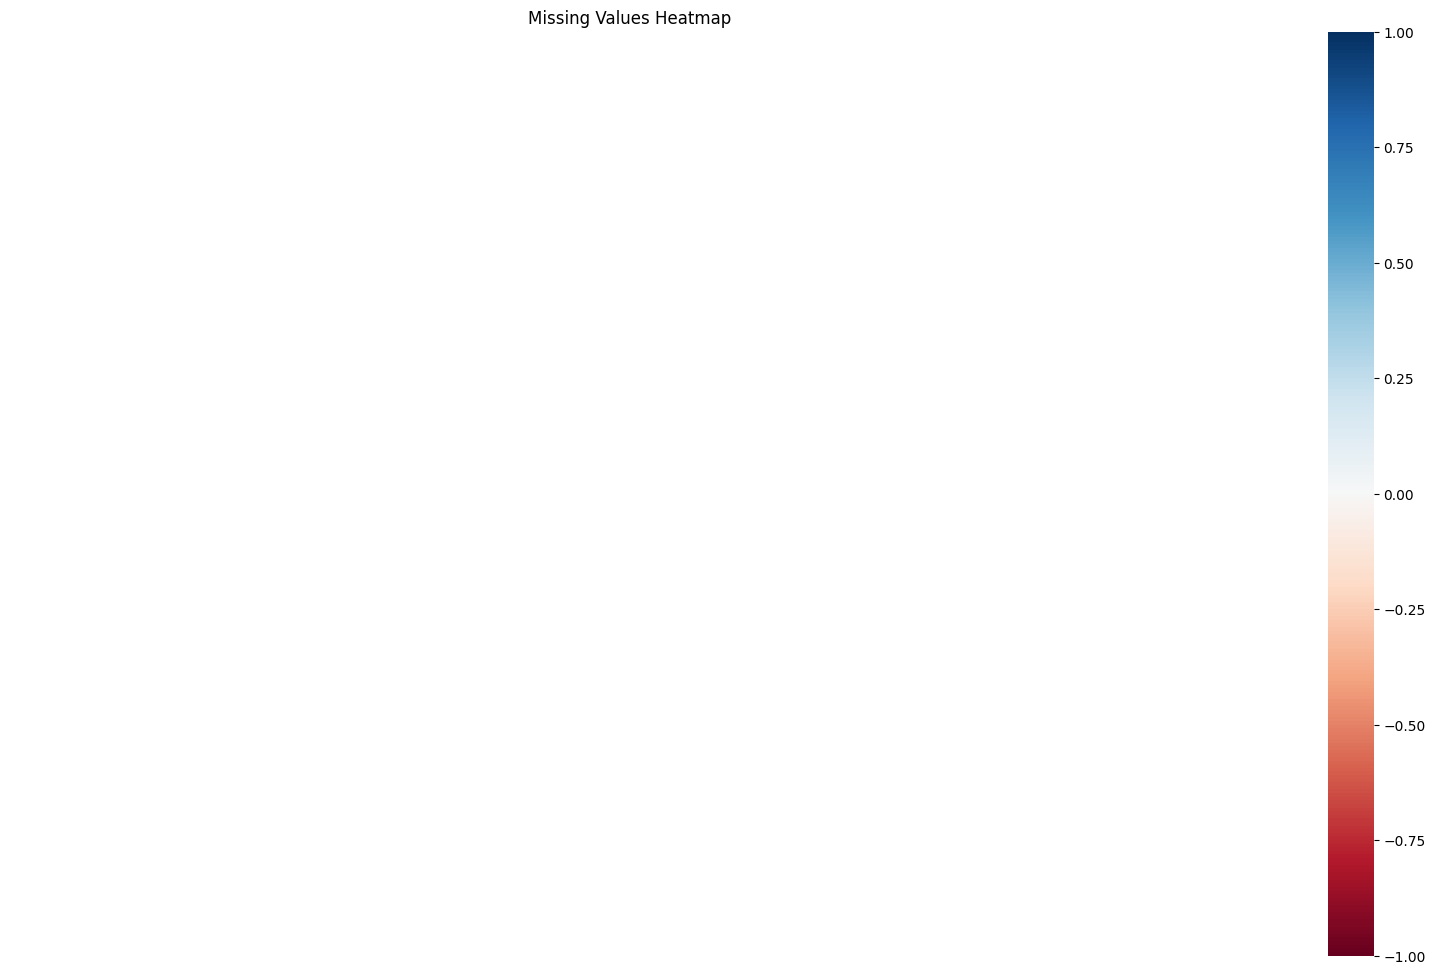

In [26]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing values using missingno
msno.matrix(loans_df)
plt.title('Missing Values Matrix Before Handling')
plt.show()

# Calculate the percentage of nulls in each column
null_percentages =loans_df .isnull().mean() * 100

# Columns with nulls over 50%
columns_to_drop = null_percentages[null_percentages > 50].index.tolist()
loans_df.drop(columns=columns_to_drop, inplace=True)

# Columns with under 10% nulls
columns_to_impute = null_percentages[(null_percentages > 0) & (null_percentages < 10)].index.tolist()
for col in columns_to_impute:
    if loans_df[col].dtype == 'object':
        loans_df[col].fillna(loans_df[col].mode()[0], inplace=True)  # Impute categorical columns with mode
    else:
        if abs(loans_df[col].skew()) > 1:  # Check skewness for numerical columns
            loans_df[col].fillna(loans_df[col].median(), inplace=True)  # Impute with median if highly skewed
        else:
            loans_df[col].fillna(loans_df[col].mean(), inplace=True)  # Otherwise, impute with mean

# Dropping rows with date columns having >1% nulls
date_columns = []  # Replace with your actual date columns
for col in date_columns:
    if col in loans_df.columns:
        if loans_df[col].isnull().mean() > 1:
            loans_df.dropna(subset=[col], inplace=True)

# Visualize missing values after handling
msno.matrix(loans_df)
plt.title('Missing Values Matrix')
plt.show()

# Additionally, you can create a heatmap to see the correlation of missingness between columns
msno.heatmap(loans_df)
plt.title('Missing Values Heatmap')
plt.show()